# Yellowbrick Tutorial

This notebook provides a few examples of the visualizers available in the Yellowbrick library that enable a data scientist to more efficiently perform feature analysis, model selection, and hyperparameter tuning.  Note that the Yellowbrick API is very similar to Scikit-Learn, which makes it very easy to use.

<img src="scikit_yb.png">

### Datasets used in this workbook

The datasets used in this workbook were sourced from the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) and are available in the yellowbrick.datasets module.  More information about using the datasets can be found [here](https://www.scikit-yb.org/en/latest/api/datasets.html).

### Setting up project

In [1]:
%matplotlib inline

In [2]:
# setting up imports
import os
import sys 

# Modify the path 
sys.path.append("..")

import numpy as np 
import pandas as pd
import yellowbrick as yb 
import matplotlib as mpl 
import matplotlib.pyplot as plt 

mpl.rcParams["figure.figsize"] = (9,6)

## Section 1: Feature Analysis

Before deciding on a model, it is important to understand the features in the data and how they can impact the model selection process.  It is also particularly important in cases where there are a significant number of features to determine if there is a way to reduce the numbers without compromising the model's effectiveness.  In other words, the objective is to run the model against a smaller subset of features that will most inform the model.

### Rank Features

The `Rank2D` visualizer is a two-dimensional ranking of features that utilizes a ranking algorithm that takes into account pairs of features at a time (e.g. joint plot analysis). The pairs of features are then ranked by score and visualized using the lower left triangle of a feature co-occurence matrix.

In the following example, we use the pearson correlation algorithm, which is the covariance of two features divided by their standard deviations.  If features are highly correlated to each other, we can remove the duplicate features as they would not add value to the model.



In [25]:
# This notebook was based on YB 1.0, not yet released.  Added some work below to get the data, 
# since the X, y = load_credit() method doesn't work until 1.0...
# https://www.scikit-yb.org/en/latest/api/datasets.html
# Pro tip:  check out the readme files in each dataset (in FIXTURES path)!

import os

from yellowbrick.download import download_all

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "bikeshare": os.path.join(FIXTURES, "bikeshare", "bikeshare.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "energy": os.path.join(FIXTURES, "energy", "energy.csv"),
    "game": os.path.join(FIXTURES, "game", "game.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "spam": os.path.join(FIXTURES, "spam", "spam.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files.
    """

    # Get the path from the datasets
    path = datasets[name]

    # Check if the data exists, otherwise download or raise
    if not os.path.exists(path):
        if download:
            download_all()
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))


    # Return the data frame
    return pd.read_csv(path)

data = load_data('credit')

In [36]:
print(FIXTURES)              # path to my data
print(type(data)) 
data.columns

/Users/melissacirtain/work/Statistical_Seminars_DC/data
<class 'pandas.core.frame.DataFrame'>


Index(['limit', 'sex', 'edu', 'married', 'age', 'apr_delay', 'may_delay',
       'jun_delay', 'jul_delay', 'aug_delay', 'sep_delay', 'apr_bill',
       'may_bill', 'jun_bill', 'jul_bill', 'aug_bill', 'sep_bill', 'apr_pay',
       'may_pay', 'jun_pay', 'jul_pay', 'aug_pay', 'sep_pay', 'default'],
      dtype='object')

In [32]:
X = data.drop(labels='default', axis=1) # Create X and y to use below
y = data['default']
print(X.shape, y.shape)

(30000, 23) (30000,)


/Users/melissacirtain/work/envs/ml-env/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


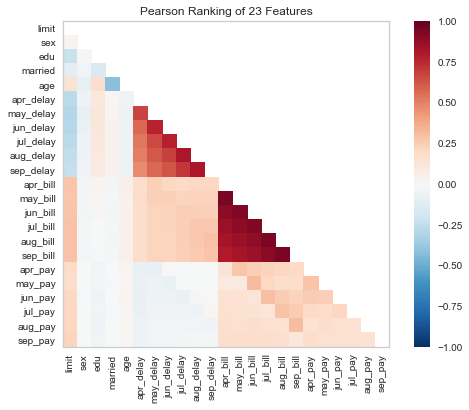

In [33]:
import yellowbrick.datasets
from yellowbrick.datasets import load_credit, fixtures
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the pearson correlation ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.poof()              # Draw/show/poof the data

### Feature Importance

Many model forms describe the underlying impact of features relative to each other. In scikit-learn, Decision Tree models and ensembles of trees such as Random Forest, Gradient Boosting, and Ada Boost provide a feature_importances_ attribute when fitted. The Yellowbrick `FeatureImportances` visualizer utilizes this attribute to rank and plot relative importances.  That is, the importance of each feature is calculated as a percentage of the feature that had the highest feature importance score.

datetime              object
temperature          float64
relative humidity    float64
light                float64
C02                  float64
humidity             float64
occupancy              int64
dtype: object
2015-02-04 17:51:00
2015-02-04 17:51:00 datetime64[ns]
Index(['datetime', 'temperature', 'relative humidity', 'light', 'C02',
       'humidity', 'occupancy'],
      dtype='object') occupancy
(20560, 5) (20560,)


FeatureImportances(absolute=False,
          ax=<matplotlib.axes._subplots.AxesSubplot object at 0x12f0cf278>,
          labels=None, model=None, relative=True, stack=False, xlabel=None)

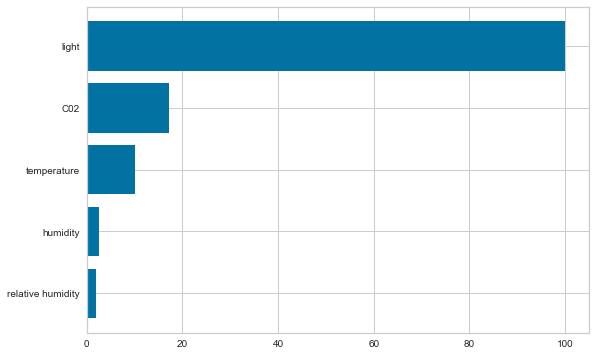

In [54]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.datasets import load_occupancy
from yellowbrick.features import FeatureImportances

# Load the classification data set
# X, y = load_occupancy()  # only works in YB 1.0+
data = load_data('occupancy')
print(data.dtypes)
print(data['datetime'].iloc[0])

data['datetime'] = pd.to_datetime(data['datetime'], )
print(data['datetime'].iloc[0], data['datetime'].dtype)

y_col = data.columns[-1]
print(data.columns, y_col)
X = data.drop(labels=[y_col, 'datetime'], axis=1) # Create X and y to use below
y = data[y_col]
print(X.shape, y.shape)

model = RandomForestClassifier(n_estimators=10)
visualizer = FeatureImportances(model)
visualizer.fit(X, y)
#visualizer.poof()

## Section 2: Model Selection

Select a model family that best defines the relationship between the variables of interest.  There are several visualizers that help guide this process.  We will look at a few examples.

### Classification Report 

The classification report visualizer displays the precision, recall, and F1 scores for a model. If `support=True` is added, it also provides the number of occurences of each label.  Integrates numerical scores as well color-coded heatmap in order for easy interpretation and detection. 

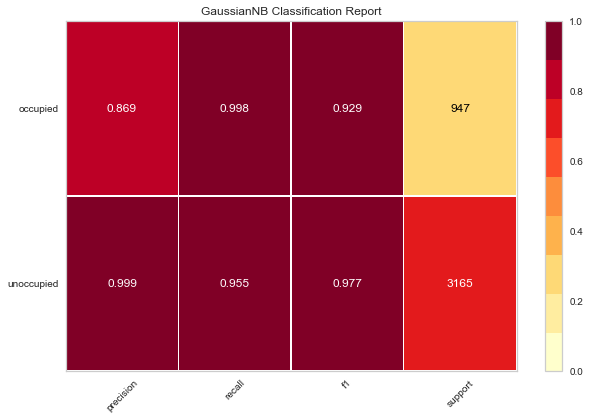

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy

# Load the classification data set
#X, y = load_occupancy()

# Specify the classes of the target
classes = ["unoccupied", "occupied"]

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the classification model and visualizer
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()             # Draw/show/poof the data

### Residuals Plot

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

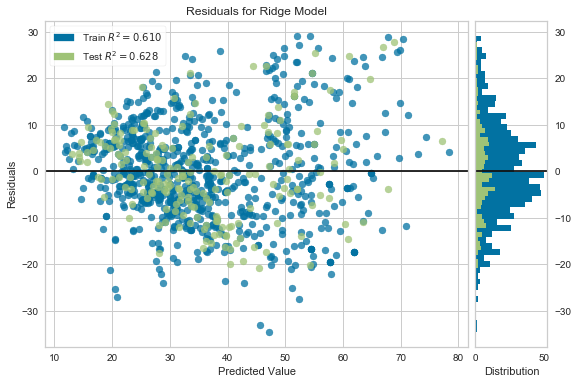

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

### Dispersion Plot

A word’s importance can be weighed by its dispersion in a corpus. Lexical dispersion is a measure of a word’s homogeneity across the parts of a corpus. This plot notes the occurrences of a word and how many words from the beginning of the corpus it appears.

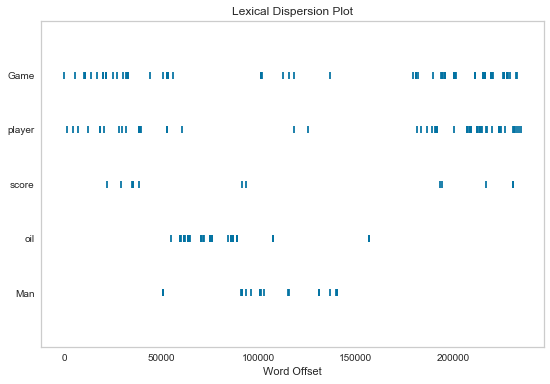

In [7]:
from yellowbrick.text import DispersionPlot
from yellowbrick.datasets import load_hobbies

# Load the text data
corpus = load_hobbies()

# Create a list of words from the corpus text
text = [doc.split() for doc in corpus.data]

# Choose words whose occurence in the text will be plotted
target_words = ['Game', 'player', 'score', 'oil', 'Man']

# Create the visualizer and draw the plot
visualizer = DispersionPlot(target_words)
visualizer.fit(text)
visualizer.poof()

A very interesting example of the dispersion plot is on the NLTK website where a synthetic text was created by combining 220 years of the U.S. Presidential Inaugural Addresses.  The visualization compared the usage of the words: **citizens, democracy, freedom, duties, America**.  Note the changes in the visualization below.

Source: https://www.nltk.org
<img src="nltk_viz.png">

## Section 3: Hyperparameter Tuning

A number of machine learning models contain hyperparameters that need to be tuned during the fitting and prediction process.  In other words, there is a trial and error that has to take place to determine the values that will produce the best model.  Yellowbrick has visualizers that allows users to quickly determine the best hyperparameters.

### Silhouette Visualizer

Silhouette analysis can be used to evaluate the density and separation between clusters.  The score is calculated by averaging the silhouette coefficient for each sample, which is computed as the difference between the average intra-cluster distance and the mean nearest-cluster distance for each sample, normalized by the maximum value.  Silhouette coefficients close to 1 indicate that the sample is far away from its neighboring clusters while a coefficient close to 0 indicates that it is close to the decision boundary between neighboring clusters. 

Let's take an example where we create a synthetic dataset with 8 random clusters and run the KMeans clustering algorithm against it first using 6 as the number of clusters and then second using 8 as the number of clusters.  We then use the Silhouette Visualizer to compare the difference.

As can be expected, the second visualization shows a higher average silhouette score.  In both cases, most of the clusters had higher silhouette scores than the average, but it is important to note that the first visualization shows that there are two samples that are bigger in size than the other four, which indicates that they are probably groupings of more than one sub cluster.

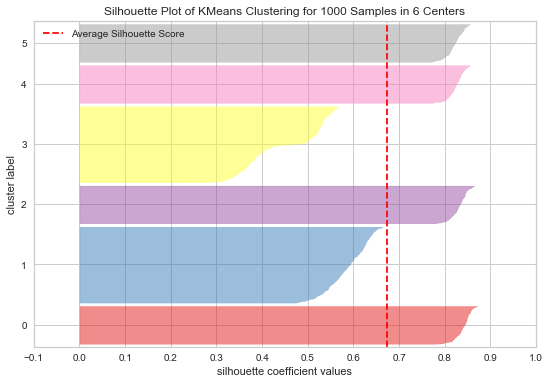

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic dataset with 8 random clusters
X, y = make_blobs(n_samples=1000, n_features=12, centers=8, shuffle=True, random_state=42)

# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

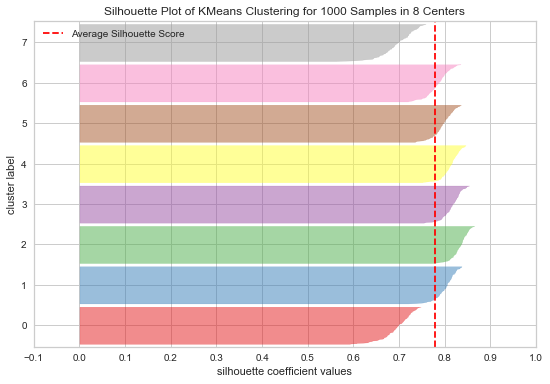

In [9]:
# Second example with 8 clusters

model = KMeans(8)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data